# Lab 3: Introducing Classification

Objectives:
- To gain hands-on experience classifying small dataset
- To implement concepts related to Decision Tree classifier (i.e. Entropy, Information Gain), along with the Decision Tree algorithm

In [72]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Read the data
df = pd.read_csv('toy_data.csv')
df

,age,income,student,credit rating,buys computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31-40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [73]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            14 non-null     object
 1   income         14 non-null     object
 2   student        14 non-null     object
 3   credit rating  14 non-null     object
 4   buys computer  14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes
None


# Calculate Gain

### entropy(t)

In [74]:
entropy_t = 0
n=df.shape[0]
countt = df['buys computer'].value_counts()
entropy_t = -countt['yes']*math.log2(countt['yes']/n)/n - countt['no']*math.log2(countt['no']/n)/n
print(entropy_t)

0.940285958670631


### entropy(i)

In [97]:
def entropy (df, target_att):
    ans = 0
    # print(f"n = {n}")
    for data in df[target_att].unique():
        print("data",data)
        n_i = df[(df[target_att] == data)].shape[0]
        # print("size",n_i)
        p_jyes = df[(df[target_att] == data) & (df['buys computer'] == "yes")].shape[0]/n_i
        # print(f"p(j=yes|{data})={p_jyes}")
        p_jno = df[(df[target_att] == data) & (df['buys computer'] == "no")].shape[0]/n_i
        # print(f"p(j=no|{data})={p_jno}")
        if (p_jyes == 0 or p_jno == 0):
            log_j = 0
        else:
            log_j = -(p_jyes * math.log2(p_jyes) + p_jno * math.log2(p_jno))
        # print(f"log(j|{data})={log_j}")
        ans += (n_i*log_j/n)
        # print("\n")
    return ans

### Gain fn

In [100]:
def gain_fn (target_att):
    return entropy_t - entropy(df,target_att)

# Calculation

In [101]:
gain_fn("age")

data <=30
data 31-40
data >40


0.2467498197744391

In [102]:
gain_fn("income")

data high
data medium
data low


0.029222565658954758

In [103]:
gain_fn("student")

data no
data yes


0.15183550136234147

In [104]:
gain_fn("credit rating")

data fair
data excellent


0.04812703040826938

# Decision Tree

make it all numerical

In [82]:
df_num = df.copy()
d = {'<=30':0, '31-40':1, '>40':2}
df_num['age'] = df_num['age'].map(d)
d = {'high':2,'medium':1,'low':0}
df_num['income'] = df_num['income'].map(d)
d = {'yes':1,'no':0}
df_num['student'] = df_num['student'].map(d)
df_num['buys computer'] = df_num['buys computer'].map(d)
d = {'excellent':1,'fair':0}
df_num['credit rating'] = df_num['credit rating'].map(d)

In [83]:
features = ['age','income','student','credit rating']
X = df_num[features]
y = df_num['buys computer']
print(X)
print(y)

    age  income  student  credit rating
0     0       2        0              0
1     0       2        0              1
2     1       2        0              0
3     2       1        0              0
4     2       0        1              0
5     2       0        1              1
6     1       0        1              1
7     0       1        0              0
8     0       0        1              0
9     2       1        1              0
10    0       1        1              1
11    1       1        0              1
12    1       2        1              0
13    2       1        0              1
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: buys computer, dtype: int64


[Text(0.4444444444444444, 0.9, 'student <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2222222222222222, 0.7, 'age <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.1111111111111111, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3333333333333333, 0.5, 'credit rating <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2222222222222222, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.3, 'age <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7, 'credit rating <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5555555555555556, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7777777777777778, 0.5, 'age <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.3, 'entr

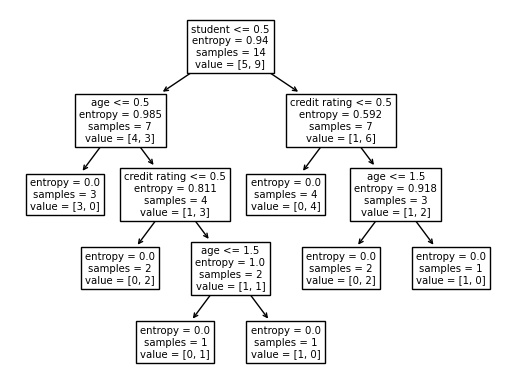

In [84]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
dtree = DecisionTreeClassifier(criterion="entropy")
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)